# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 10,5

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

`### ваше решение тут ###`

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [ ]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [ ]:
import numpy as np
from dataclasses import dataclass
from enum import auto
from enum import Enum
from typing import Dict
from typing import Type
@dataclass
class LearningRate:
    lambda_: float = 1e-3
    s0: float = 1
    p: float = 0.5

    iteration: int = 0

    def __call__(self):
        """
        Calculate learning rate according to lambda (s0/(s0 + t))^p formula
        """
        self.iteration += 1
        return self.lambda_ * (self.s0 / (self.s0 + self.iteration)) ** self.p


class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()


class BaseDescent:
    """
    A base class and templates for all functions
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        """
        :param dimension: feature space dimension
        :param lambda_: learning rate parameter
        :param loss_function: optimized loss function
        """
        self.w: np.ndarray = np.random.rand(dimension)
        self.lr: LearningRate = LearningRate(lambda_=lambda_)
        self.loss_function: LossFunction = loss_function

    def step(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        return self.update_weights(self.calc_gradient(x, y))

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        Template for update_weights function
        Update weights with respect to gradient
        :param gradient: gradient
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        pass

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Template for calc_gradient function
        Calculate gradient of loss function with respect to weights
        :param x: features array
        :param y: targets array
        :return: gradient: np.ndarray
        """
        pass

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculate loss for x and y with our weights
        :param x: features array
        :param y: targets array
        :return: loss: float
        """

        if self.loss_function == LossFunction.MSE:
            loss = (1 / x.shape[0]) * (y - x @ self.w).T @ (y - x @ self.w)
        return loss
        predictions = self.predict(x)
        return np.mean((y - predictions) ** 2)

        raise NotImplementedError('BaseDescent calc_loss function not implemented')

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Calculate predictions for x
        :param x: features array
        :return: prediction: np.ndarray
        """
        predictions = np.dot(x, self.w)
        return predictions
        raise NotImplementedError('BaseDescent predict function not implemented')


class VanillaGradientDescent(BaseDescent):
    """
    Full gradient descent class
    """

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        learning_rate = self.lr()
        weight_difference = -learning_rate * gradient
        self.w += weight_difference
        return weight_difference
        raise NotImplementedError('VanillaGradientDescent update_weights function not implemented')

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        y_pred = self.predict(x)
        gradient = (-2/x.shape[0]) * np.dot(x.T, (y - y_pred))
        return gradient
        raise NotImplementedError('VanillaGradientDescent calc_gradient function not implemented')


class StochasticDescent(VanillaGradientDescent):
    """
    Stochastic gradient descent class
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, batch_size: int = 50,
                 loss_function: LossFunction = LossFunction.MSE):
        """
        :param batch_size: batch size (int)
        """
        super().__init__(dimension, lambda_, loss_function)
        self.batch_size = batch_size

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        indices = np.random.randint(0, x.shape[0], self.batch_size)
        x_batch = x[indices]
        y_batch = y[indices]
        predictions = self.predict(x_batch)
        gradient = 2 / self.batch_size * x_batch.T @ (predictions - y_batch)
        return gradient
        raise NotImplementedError('StochasticDescent calc_gradient function not implemented')


class MomentumDescent(VanillaGradientDescent):
    """
    Momentum gradient descent class
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        super().__init__(dimension, lambda_, loss_function)
        self.alpha: float = 0.9

        self.h: np.ndarray = np.zeros(dimension)

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        Update weights with respect to gradient
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        learning_rate = self.lr()
        self.h = self.alpha * self.h + learning_rate * gradient
        weight_difference = -self.h
        self.w += weight_difference
        return weight_difference
        raise NotImplementedError('MomentumDescent update_weights function not implemented')


class Adam(VanillaGradientDescent):
    """
    Adaptive Moment Estimation gradient descent class
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        super().__init__(dimension, lambda_, loss_function)
        self.eps: float = 1e-8

        self.m: np.ndarray = np.zeros(dimension)
        self.v: np.ndarray = np.zeros(dimension)

        self.beta_1: float = 0.9
        self.beta_2: float = 0.999

        self.iteration: int = 0

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        Update weights & params
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        self.iteration += 1

        self.m = self.beta_1 * self.m + (1 - self.beta_1) * gradient
        self.v = self.beta_2 * self.v + (1 - self.beta_2) * (gradient ** 2)

        m_corrected = self.m / (1 - self.beta_1 ** self.iteration)
        v_corrected = self.v / (1 - self.beta_2 ** self.iteration)

        learning_rate = self.lr()
        weight_difference = -learning_rate * m_corrected / (np.sqrt(v_corrected) + self.eps)
        self.w += weight_difference

        return weight_difference
        raise NotImplementedError('Adagrad update_weights function not implemented')


class BaseDescentReg(BaseDescent):
    """
    A base class with regularization
    """

    def __init__(self, *args, mu: float = 0, **kwargs):
        """
        :param mu: regularization coefficient (float)
        """
        super().__init__(*args, **kwargs)

        self.mu = mu

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Calculate gradient of loss function and L2 regularization with respect to weights
        """
        l2_gradient = self.w

        l2_gradient[-1] = 0

        return super().calc_gradient(x, y) + l2_gradient * self.mu


class VanillaGradientDescentReg(BaseDescentReg, VanillaGradientDescent):
    """
    Full gradient descent with regularization class
    """


class StochasticDescentReg(BaseDescentReg, StochasticDescent):
    """
    Stochastic gradient descent with regularization class
    """


class MomentumDescentReg(BaseDescentReg, MomentumDescent):
    """
    Momentum gradient descent with regularization class
    """


class AdamReg(BaseDescentReg, Adam):
    """
    Adaptive gradient algorithm with regularization class
    """


def get_descent(descent_config: dict) -> BaseDescent:
    descent_name = descent_config.get('descent_name', 'full')
    regularized = descent_config.get('regularized', False)

    descent_mapping: Dict[str, Type[BaseDescent]] = {
        'full': VanillaGradientDescent if not regularized else VanillaGradientDescentReg,
        'stochastic': StochasticDescent if not regularized else StochasticDescentReg,
        'momentum': MomentumDescent if not regularized else MomentumDescentReg,
        'adam': Adam if not regularized else AdamReg
    }

    if descent_name not in descent_mapping:
        raise ValueError(f'Incorrect descent name, use one of these: {descent_mapping.keys()}')

    descent_class = descent_mapping[descent_name]

    return descent_class(**descent_config.get('kwargs', {}))

In [ ]:
from __future__ import annotations

from typing import List

import numpy as np

from descents import BaseDescent
from descents import get_descent


class LinearRegression:
    """
    Linear regression class
    """

    def __init__(self, descent_config: dict, tolerance: float = 1e-4, max_iter: int = 300):
        """
        :param descent_config: gradient descent config
        :param tolerance: stopping criterion for square of euclidean norm of weight difference (float)
        :param max_iter: stopping criterion for iterations (int)
        """
        self.descent: BaseDescent = get_descent(descent_config)

        self.tolerance: float = tolerance
        self.max_iter: int = max_iter

        self.loss_history: List[float] = []

    def fit(self, x: np.ndarray, y: np.ndarray) -> LinearRegression:
        """
        Fitting descent weights for x and y dataset
        :param x: features array
        :param y: targets array
        :return: self
        """
        self.loss_history.append(self.descent.calc_loss(x, y))

        for iteration in range(self.max_iter):
            # Вызываем step для обновления весов и получения разности весов
            weight_difference = self.descent.step(x, y)
            current_loss = self.descent.calc_loss(x, y)
            self.loss_history.append(current_loss)

            # Проверяем условие остановки по квадрату нормы разности весов
            if np.linalg.norm(weight_difference) ** 2 < self.tolerance or np.isnan(weight_difference).any():
                print(f"Сошлись после {iteration + 1} итераций.")
                break


        return self
        raise NotImplementedError('LinearRegression fit function not implemented')

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Predicting targets for x dataset
        :param x: features array
        :return: prediction: np.ndarray
        """
        return self.descent.predict(x)

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculating loss for x and y dataset
        :param x: features array
        :param y: targets array
        """
        return self.descent.calc_loss(x, y)


In [ ]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

In [ ]:
x.shape

(100, 5)

In [ ]:
y.shape

(100,)

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: 123699974


* **StochasticDescent**: 123700150


* **MomentumDescent**: 123700206


* **Adam**: 123700251

* **BaseDescentReg**: 123700376


* **LinearRegression**: 123709308

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [ ]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [ ]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [ ]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

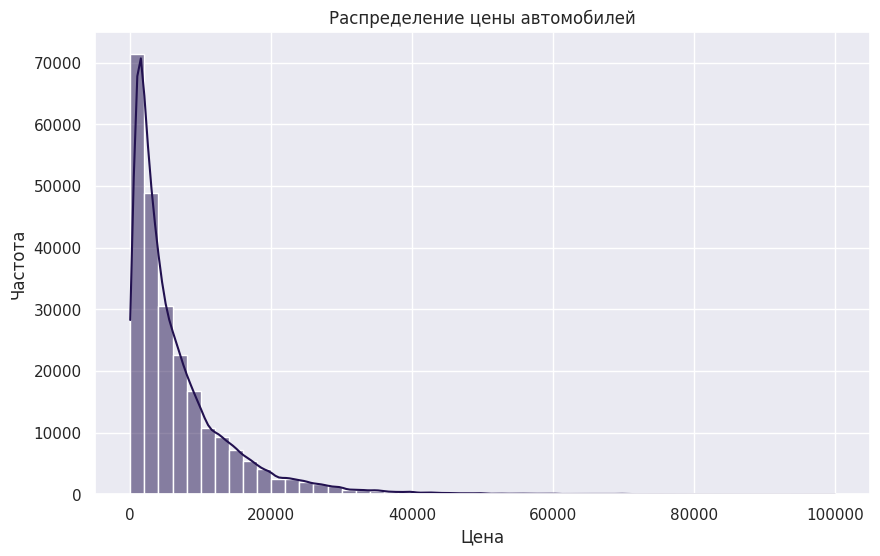

In [ ]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['kilometer', 'autoAgeMonths' ] #это дискретные численные данные
other = []

# YOUR CODE (EDA):
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True, color=sns.color_palette("magma")[0])
plt.title('Распределение цены автомобилей')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


Очевидно, что это распределение с длинным правым хвостом. Посмотрим, стоит ли логарифмировать эти данные.

In [ ]:
data['price_log'] = np.log1p(data['price'])

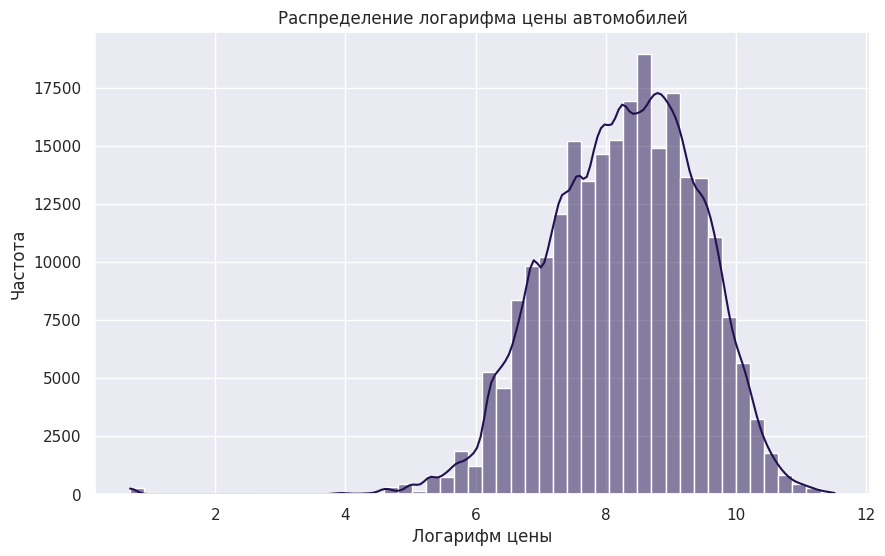

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price_log'], bins=50, kde=True, color=sns.color_palette("magma")[0])
plt.title('Распределение логарифма цены автомобилей')
plt.xlabel('Логарифм цены')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


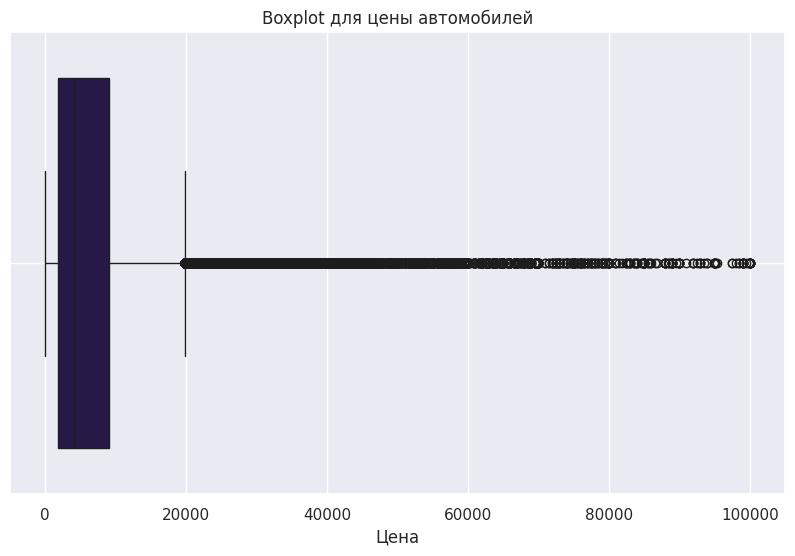

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'], color=sns.color_palette("magma")[0])
plt.title('Boxplot для цены автомобилей')
plt.xlabel('Цена')
plt.grid(True)
plt.show()

Заметим, что распределение стало ближе к нормальному (более симметричным, в том числе). Однако, как видно из графика, есть машины с аномальной ценой, поэтому предлагаю очистить данные от выбросов в целевой переменной.

In [ ]:
q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)
iqr = q3 - q1
left = q1 - 1.5 * iqr
right = q3 + 1.5 * iqr
data = data[(data['price'] > left) & (data['price'] < right)]

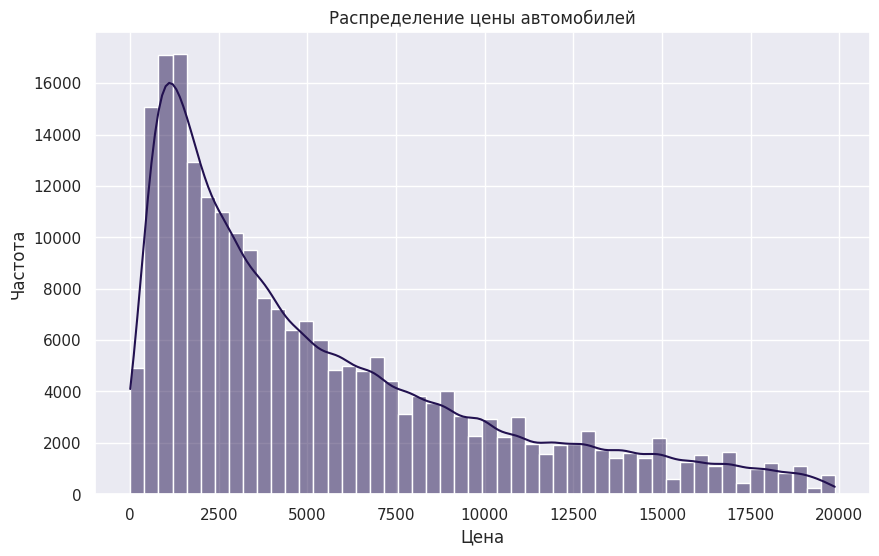

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True, color=sns.color_palette("magma")[0])
plt.title('Распределение цены автомобилей')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


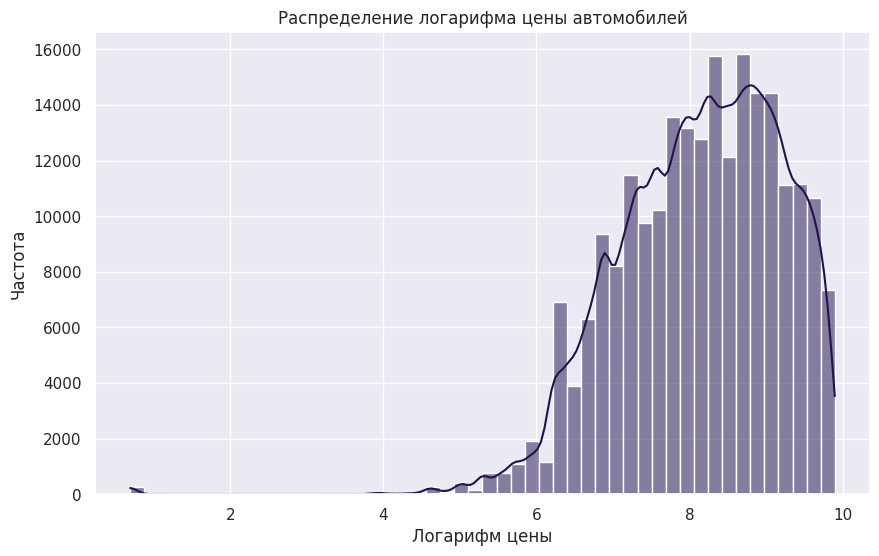

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price_log'], bins=50, kde=True, color=sns.color_palette("magma")[0])
plt.title('Распределение логарифма цены автомобилей')
plt.xlabel('Логарифм цены')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

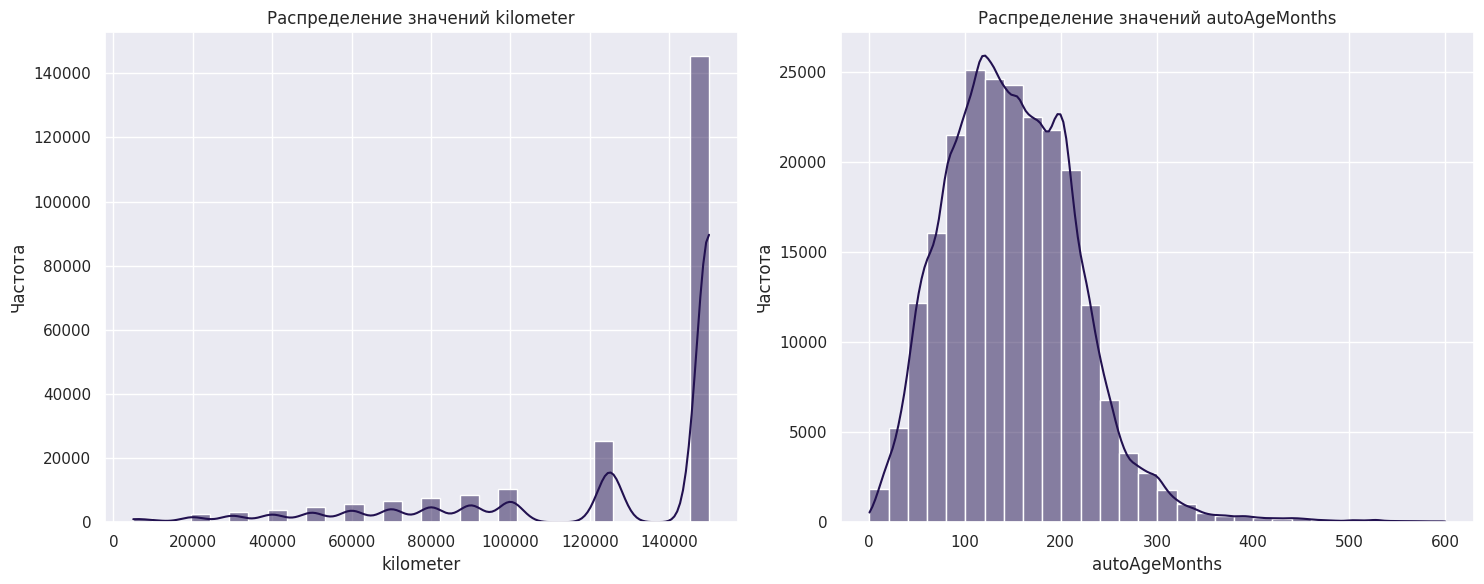

In [ ]:
# Построение графиков распределения для числовых признаков
plt.figure(figsize=(15, 6))
for i, feature in enumerate(numeric):
    plt.subplot(1, 2, i + 1)
    sns.histplot(data[feature], bins=30, kde=True, color=sns.color_palette("magma")[0])
    plt.title(f'Распределение значений {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Заметим, что распределение значений переменной kilometer далеко от нормального. Посмотрим на логарифм распределения этого признака.

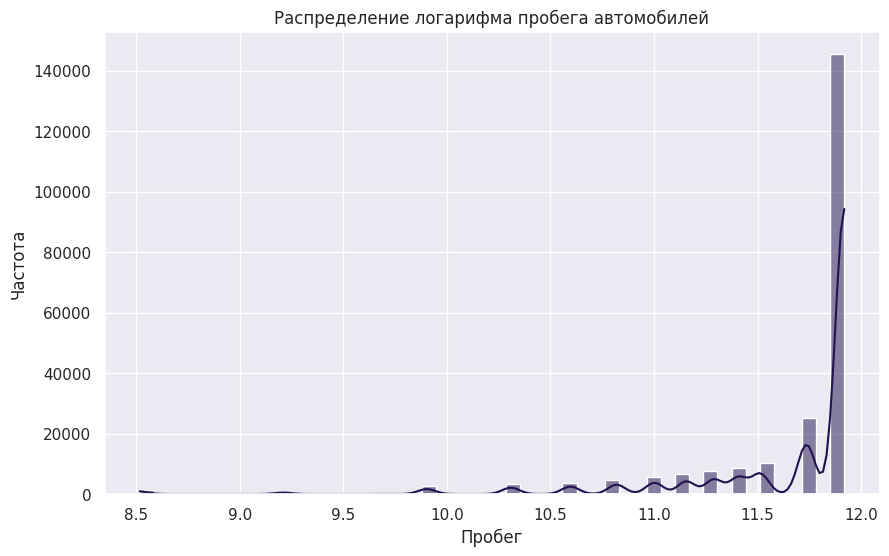

In [ ]:
data['kilometer_log'] = np.log1p(data['kilometer'])
plt.figure(figsize=(10, 6))
sns.histplot(data['kilometer_log'], bins=50, kde=True, color=sns.color_palette("magma")[0])
plt.title('Распределение логарифма пробега автомобилей')
plt.xlabel('Пробег')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

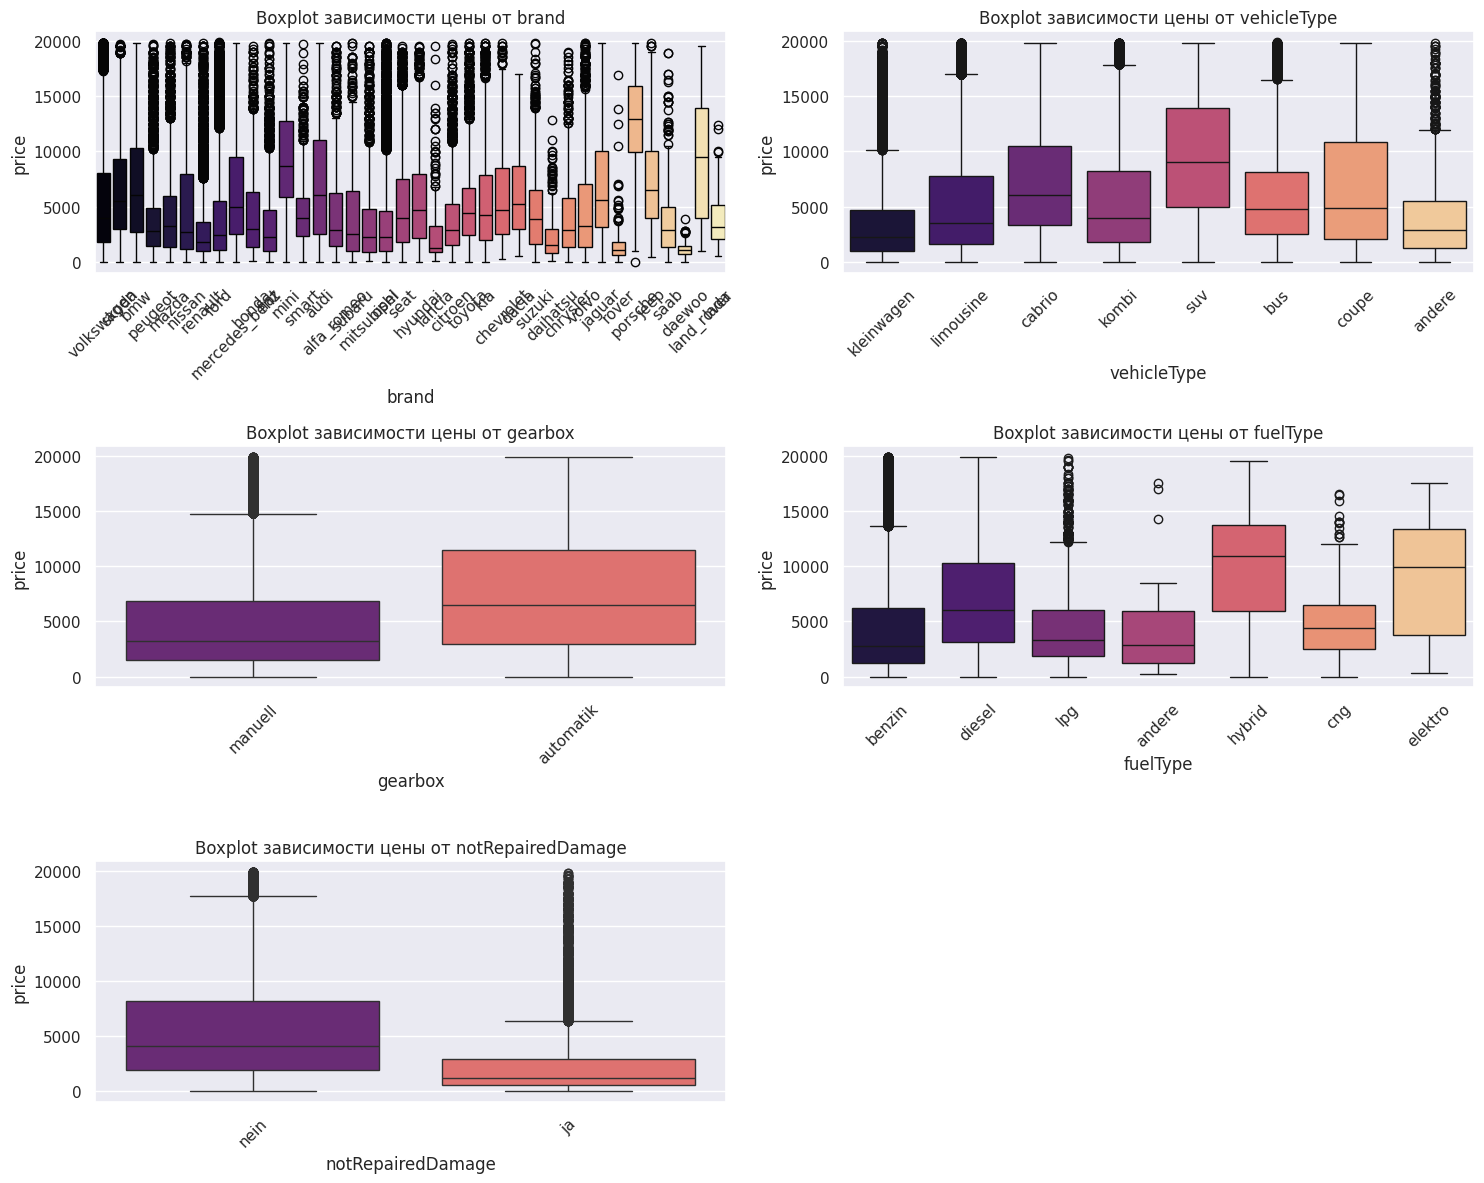

In [ ]:
# Построение boxplot для категориальных признаков
import warnings
warnings.filterwarnings("ignore")
categorical_boxes = ['brand', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_boxes):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=feature, y='price', data=data, palette='magma')
    plt.title(f'Boxplot зависимости цены от {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Попробуем изучить выбросы. Например, возможно механическая коробка передач автоматически означает более высокую цену автомобиля. Посмотрим на распределение.

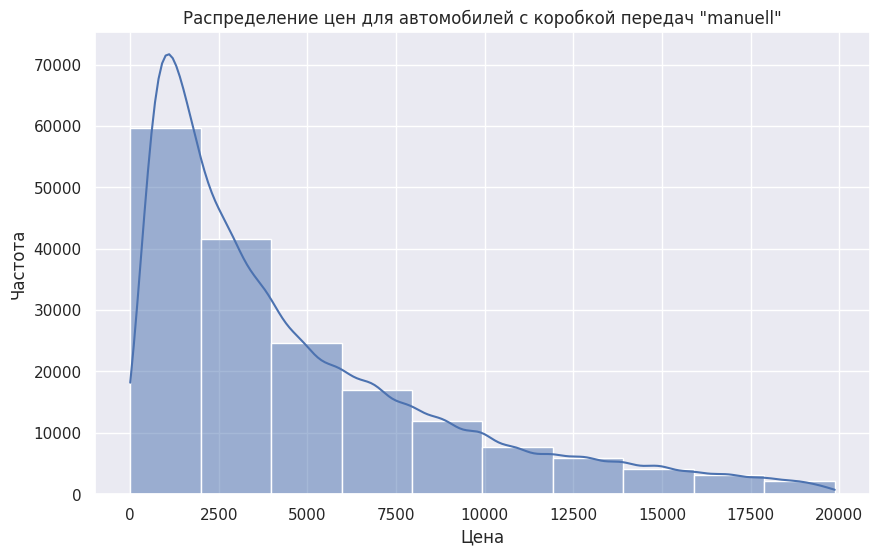

In [ ]:
filtered_data = data[data['gearbox'] == 'manuell']

# Визуализируем распределение цен
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['price'], bins=10, kde=True)
plt.title('Распределение цен для автомобилей с коробкой передач "manuell"')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [ ]:
def outliers(column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    left = q1 - 1.5 * iqr
    right = q3 + 1.5 * iqr
    return left, right

for i in numeric:
    left, right = outliers(i)
    data = data[(data[i] > left) & (data[i] < right)]

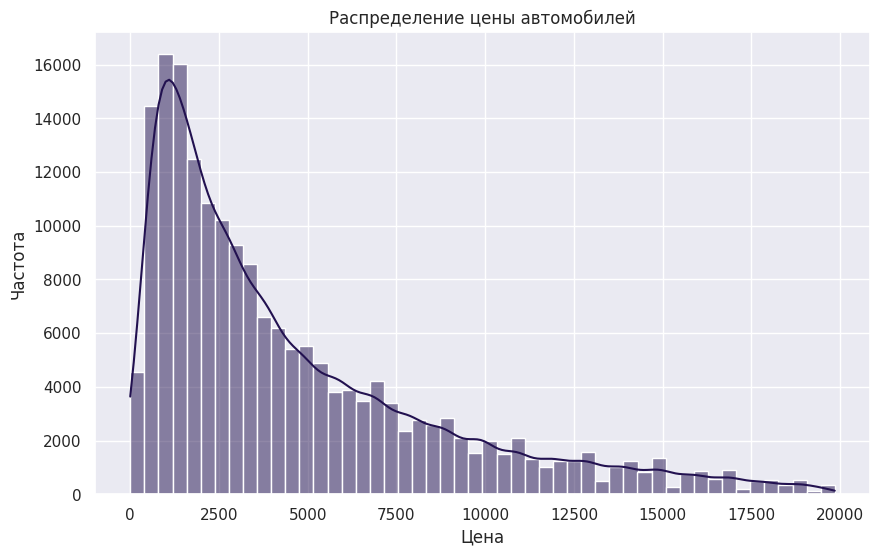

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True, color=sns.color_palette("magma")[0])
plt.title('Распределение цены автомобилей')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_temp, X_train, y_temp, y_train = train_test_split(x, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
y_val = y_val.to_numpy()

In [ ]:
y_test = y_test.to_numpy()

In [ ]:
y_train = y_train.to_numpy()

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [ ]:
X_train = X_train.toarray()

In [ ]:
X_val = X_val.toarray()

In [ ]:
lambda_values = np.logspace(-5, 1, num=10)
descent_methods = ['full', 'stochastic', 'momentum', 'adam']

results = []
best_options = []
for i in descent_methods:
    for j in lambda_values:
        descent_config = {
        'descent_name': i,
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': j
        }
        }
        model = LinearRegression(descent_config)
        model.fit(X_train, y_train)
        loss = model.calc_loss(X_val, y_val)

Сошлись после 156 итераций.
Сошлись после 1 итераций.
Сошлись после 1 итераций.
Сошлись после 1 итераций.
Сошлись после 2 итераций.
Сошлись после 63 итераций.


In [ ]:
from sklearn.metrics import r2_score
import numpy as np

lambda_values = np.logspace(-5, 1, num=10)
descent_methods = ['full', 'stochastic', 'momentum', 'adam']

results = []

for method in descent_methods:
    best_loss = np.inf
    best_lambda = None
    best_r2 = None
    best_train_loss = None
    best_val_loss = None
    best_iterations = None

    for lambda_ in lambda_values:
        descent_config = {
            'descent_name': method,
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_': lambda_
            }
        }

        model = LinearRegression(descent_config)
        model.fit(X_train, y_train)
        train_loss = model.calc_loss(X_train, y_train)
        val_loss = model.calc_loss(X_val, y_val)
        y_val_pred = model.predict(X_val)
        r2 = r2_score(y_val, y_val_pred)

        # Проверяем, является ли текущая валидационная ошибка наименьшей
        if val_loss < best_loss:
            best_loss = val_loss
            best_lambda = lambda_
            best_r2 = r2
            best_train_loss = train_loss
            best_val_loss = val_loss
            best_iterations = len(model.loss_history)

    results.append({
        'method': method,
        'best_lambda': best_lambda,
        'best_r2': best_r2,
        'train_loss': best_train_loss,
        'val_loss': best_val_loss,
        'iterations': best_iterations
    })

# Выводим результаты
for result in results:
    print(f"Method: {result['method']}, Best Lambda: {result['best_lambda']}, "
          f"Validation Loss: {result['val_loss']}, R^2: {result['best_r2']}, "
          f"Train Loss: {result['train_loss']}, Iterations: {result['iterations']}")

Сошлись после 193 итераций.
Сошлись после 1 итераций.
Сошлись после 1 итераций.
Сошлись после 1 итераций.
Сошлись после 2 итераций.
Сошлись после 63 итераций.
Method: full, Best Lambda: 0.46415888336127725, Validation Loss: 5951973.175376256, R^2: 0.6546049026588547, Train Loss: 5976082.043944996, Iterations: 301
Method: stochastic, Best Lambda: 0.46415888336127725, Validation Loss: 5944551.785887245, R^2: 0.6550355685018339, Train Loss: 5973928.723723775, Iterations: 301
Method: momentum, Best Lambda: 0.46415888336127725, Validation Loss: 5217302.731185015, R^2: 0.6972380870009623, Train Loss: 5216791.899727549, Iterations: 301
Method: adam, Best Lambda: 10.0, Validation Loss: 21467092.538342834, R^2: -0.2457429323752931, Train Loss: 21343032.61874285, Iterations: 301


In [ ]:
descent_methods = {
    'Vanilla': {
        'descent_name': 'full',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 0
        }
    },
    'Stochastic': {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 0,
            'batch_size': 10
        }
    },
    'Momentum': {
        'descent_name': 'momentum',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 0
        }
    },
    'Adam': {
        'descent_name': 'adam',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 0
        }
    }
}


### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [ ]:

lambda_values = np.logspace(-5, 1, num=10)
descent_methods = ['full', 'stochastic', 'momentum', 'adam']

results = []
loss_histories = {method: [] for method in descent_methods}

for method in descent_methods:
    best_loss = np.inf
    best_lambda = None
    best_r2 = None
    best_train_loss = None
    best_val_loss = None
    best_iterations = None

    for lambda_ in lambda_values:
        descent_config = {
            'descent_name': method,
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_': lambda_
            }
        }

        model = LinearRegression(descent_config)
        model.fit(X_train, y_train)
        loss_histories[method].append(model.loss_history)

        train_loss = model.calc_loss(X_train, y_train)
        val_loss = model.calc_loss(X_val, y_val)
        y_val_pred = model.predict(X_val)
        r2 = r2_score(y_val, y_val_pred)

        if val_loss < best_loss:
            best_loss = val_loss
            best_lambda = lambda_
            best_r2 = r2
            best_train_loss = train_loss
            best_val_loss = val_loss
            best_iterations = len(model.loss_history)

    results.append({
        'method': method,
        'best_lambda': best_lambda,
        'best_r2': best_r2,
        'train_loss': best_train_loss,
        'val_loss': best_val_loss,
        'iterations': best_iterations
    })

for result in results:
    print(f"Method: {result['method']}, Best Lambda: {result['best_lambda']}, "
          f"Validation Loss: {result['val_loss']}, R^2: {result['best_r2']}, "
          f"Train Loss: {result['train_loss']}, Iterations: {result['iterations']}")



Сошлись после 171 итераций.
Сошлись после 1 итераций.
Сошлись после 1 итераций.
Сошлись после 1 итераций.
Сошлись после 2 итераций.
Сошлись после 63 итераций.
Method: full, Best Lambda: 0.46415888336127725, Validation Loss: 5952014.648923203, R^2: 0.6546024959343344, Train Loss: 5976116.56624598, Iterations: 301
Method: stochastic, Best Lambda: 0.46415888336127725, Validation Loss: 5988691.222753942, R^2: 0.6524741414516874, Train Loss: 6007841.346813599, Iterations: 301
Method: momentum, Best Lambda: 0.46415888336127725, Validation Loss: 5217289.650172933, R^2: 0.6972388460966956, Train Loss: 5216779.75677304, Iterations: 301
Method: adam, Best Lambda: 10.0, Validation Loss: 21468535.154836252, R^2: -0.24582664791793518, Train Loss: 21344475.59864422, Iterations: 301


In [ ]:
def pad_sequences(sequences):
    max_length = max(len(seq) for seq in sequences)
    padded = np.full((len(sequences), max_length), np.nan)

    for i, seq in enumerate(sequences):
        padded[i, :len(seq)] = seq

    return padded

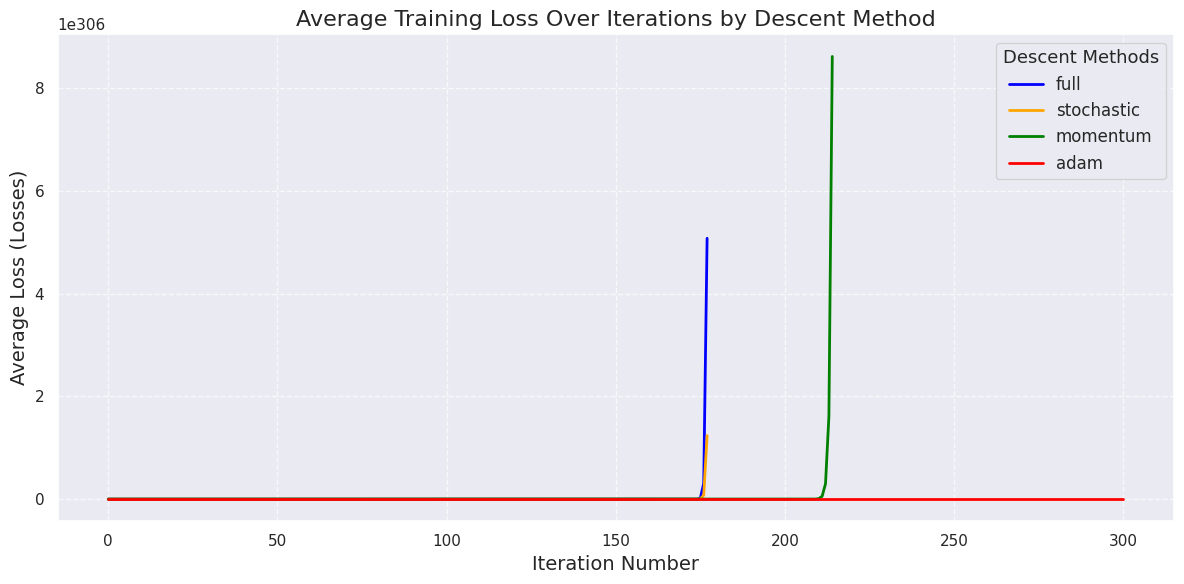

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(12, 6))
colors = ['blue', 'orange', 'green', 'red']

for idx, method in enumerate(descent_methods):
    valid_histories = [history for history in loss_histories[method] if len(history) > 0]

    if valid_histories:
        padded_losses = pad_sequences(valid_histories)
        avg_losses = np.nanmean(padded_losses, axis=0)

        # Plotting with custom markers and colors
        plt.plot(range(len(avg_losses)), avg_losses,
                 label=method,
                 color=colors[idx],
                 linewidth=2,
                 linestyle='-')
    else:
        avg_losses = []

plt.title('Average Training Loss Over Iterations by Descent Method', fontsize=16)
plt.xlabel('Iteration Number', fontsize=14)
plt.ylabel('Average Loss (Losses)', fontsize=14)

plt.legend(title='Descent Methods', title_fontsize='13', fontsize='12')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [ ]:
descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': X_train.shape[1],
        'batch_size': 10
    }
}

In [ ]:
import time

batch_sizes = np.arange(5, 500, 10)
max_iterations = 10
k = 10  # Количество запусков для каждого размера батча
tolerance = 1e-6
iterations_results = []
time_results = []

def run_linear_regression_with_batch_size(batch_size, X_train, y_train, max_iterations=10, tolerance=0):
    descent_config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': X_train.shape[1],
            'batch_size': batch_size
        }
    }

    total_iterations = 0
    start_time = time.time()
    for _ in range(k):
        regression = LinearRegression(
            descent_config=descent_config,
            tolerance=tolerance,
            max_iter=max_iterations
        )
        regression.fit(X_train, y_train)
        total_iterations += len(regression.loss_history)

    elapsed_time = time.time() - start_time

    return total_iterations / k, elapsed_time

for batch_size in batch_sizes:
    avg_iterations, elapsed_time = run_linear_regression_with_batch_size(batch_size, X_train, y_train)

    iterations_results.append(avg_iterations)
    time_results.append(elapsed_time)



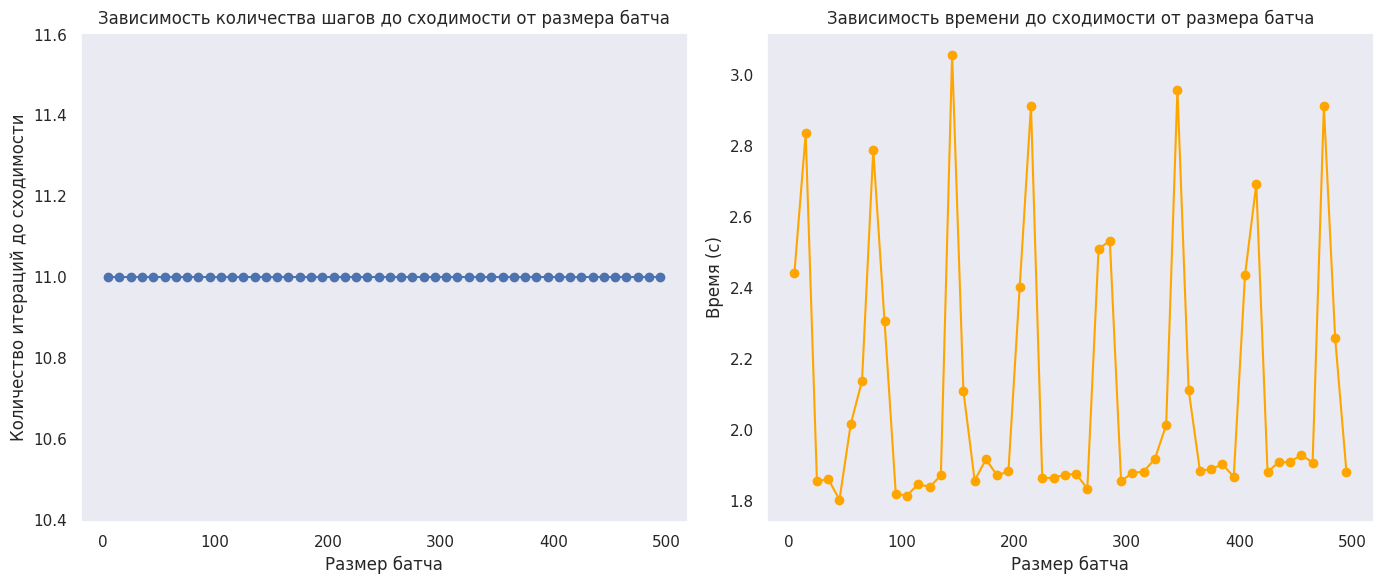

In [ ]:

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(batch_sizes, iterations_results, marker='o')
plt.title('Зависимость количества шагов до сходимости от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Количество итераций до сходимости')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(batch_sizes, time_results, marker='o', color='orange')
plt.title('Зависимость времени до сходимости от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Время (с)')
plt.grid()

plt.tight_layout()
plt.show()


Судя по всему, стоит брать батчи с какой-то периодичностью, учитывая, что крупные батчи обеспечивают стабильность градиентов, то лучше брать батчи крупнее.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: 123700376

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

Сошлись после 267 итераций.
NaN detected during training with full (lambda=10.0, mu=10.0). Skipping...
Сошлись после 179 итераций.
Сошлись после 179 итераций.
Сошлись после 160 итераций.
Сошлись после 166 итераций.
Сошлись после 185 итераций.
Сошлись после 168 итераций.
Сошлись после 192 итераций.
Сошлись после 191 итераций.
Сошлись после 186 итераций.
Сошлись после 111 итераций.
Сошлись после 272 итераций.
NaN detected during training with stochastic (lambda=10.0, mu=10.0). Skipping...
Сошлись после 279 итераций.
NaN detected during training with momentum (lambda=10.0, mu=10.0). Skipping...
Сошлись после 1 итераций.
Сошлись после 1 итераций.
Сошлись после 1 итераций.
Сошлись после 1 итераций.
Сошлись после 1 итераций.
Сошлись после 1 итераций.
Сошлись после 1 итераций.
Сошлись после 1 итераций.
Сошлись после 1 итераций.
Сошлись после 1 итераций.
Сошлись после 1 итераций.
Сошлись после 1 итераций.
Сошлись после 1 итераций.
Сошлись после 1 итераций.
Сошлись после 1 итераций.
Сошлись пос

TypeError: object of type 'numpy.float64' has no len()

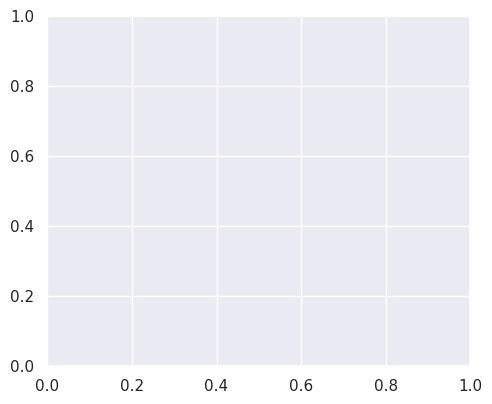

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

lambda_values = np.logspace(-5, 1, num=10)
mu_values = np.logspace(-5, 1, num=10)
descent_methods = ['full', 'stochastic', 'momentum', 'adam']


results = []
loss_histories_with_reg = {method: [] for method in descent_methods}

for method in descent_methods:

    best_loss_reg = np.inf
    best_lambda_reg = None
    best_mu_reg = None
    best_r2_reg = None
    best_train_loss_reg = None
    best_val_loss_reg = None
    best_iterations_reg = None


    for lambda_ in lambda_values:
        for mu_ in mu_values:
            descent_config_with_reg = {
                'descent_name': method,
                'kwargs': {
                    'dimension': X_train.shape[1],
                    'lambda_': lambda_,
                    'mu': mu_,
                },
                'regularized': True
            }

            model_with_reg = LinearRegression(descent_config_with_reg)
            model_with_reg.fit(X_train, y_train)
            train_loss_reg = model_with_reg.calc_loss(X_train, y_train)
            val_loss_reg = model_with_reg.calc_loss(X_val, y_val)
            y_val_pred_reg = model_with_reg.predict(X_val)

            if np.isnan(train_loss_reg) or np.isnan(val_loss_reg) or np.isnan(y_val_pred_reg).any():
                print(f"NaN detected during training with {method} (lambda={lambda_}, mu={mu_}). Skipping...")
                continue

            r2_reg = r2_score(y_val, y_val_pred_reg)

            if val_loss_reg < best_loss_reg:
                best_loss_reg = val_loss_reg
                best_lambda_reg = lambda_
                best_mu_reg = mu_
                best_r2_reg = r2_reg
                best_train_loss_reg = train_loss_reg
                best_val_loss_reg = val_loss_reg
                best_iterations_reg = len(model_with_reg.loss_history)

    results.append({
        'method': method,
        'best_lambda': best_lambda_reg,
        'best_mu': best_mu_reg,
        'best_r2': best_r2_reg,
        'train_loss': best_train_loss_reg,
        'val_loss': best_val_loss_reg,
        'iterations': best_iterations_reg,
        'loss_history_with_reg': model_with_reg.loss_history
    })


In [ ]:
def pad_sequences(sequences):
    if not sequences:
        return np.array([])
    sequences = [seq if isinstance(seq, (list, np.ndarray)) else [seq] for seq in sequences]

    max_length = max(len(seq) for seq in sequences)
    padded = np.full((len(sequences), max_length), np.nan)

    for i, seq in enumerate(sequences):
        padded[i, :len(seq)] = seq

    return padded

In [ ]:
for result in results:
    print(f"Method: {result['method']}, Loss History: {result['loss_history_with_reg']}")

Method: full, Loss History: [37970151.200892314, 44242906701.28124, 200247995329850.2, 1.047994002258122e+18, 4.3795154006394054e+21, 1.5273891631422837e+25, 4.567957524446288e+28, 1.1950895157026415e+32, 2.7772550623648693e+35, 5.802561817506047e+38, 1.1007302326062758e+42, 1.9113505030714194e+45, 3.0590410314032344e+48, 4.539108648011448e+51, 6.276341118127785e+54, 8.123151682856274e+57, 9.879312398133989e+60, 1.1329852392004537e+64, 1.2290452580398361e+67, 1.264654701770136e+70, 1.2374683790582176e+73, 1.1541204399384403e+76, 1.0280926981079802e+79, 8.764158353389122e+81, 7.162263824807496e+84, 5.620286123849847e+87, 4.241188374781152e+90, 3.0820778136676415e+93, 2.1596838965028583e+96, 1.4610094515598156e+99, 9.552642830879218e+101, 6.043132996838265e+104, 3.702551529077951e+107, 2.1991102631167195e+110, 1.2673103496227503e+113, 7.092032521392137e+115, 3.857022589180577e+118, 2.0400987911709042e+121, 1.0502068795570207e+124, 5.2651989823215583e+126, 2.5724579714699395e+129, 1.22557

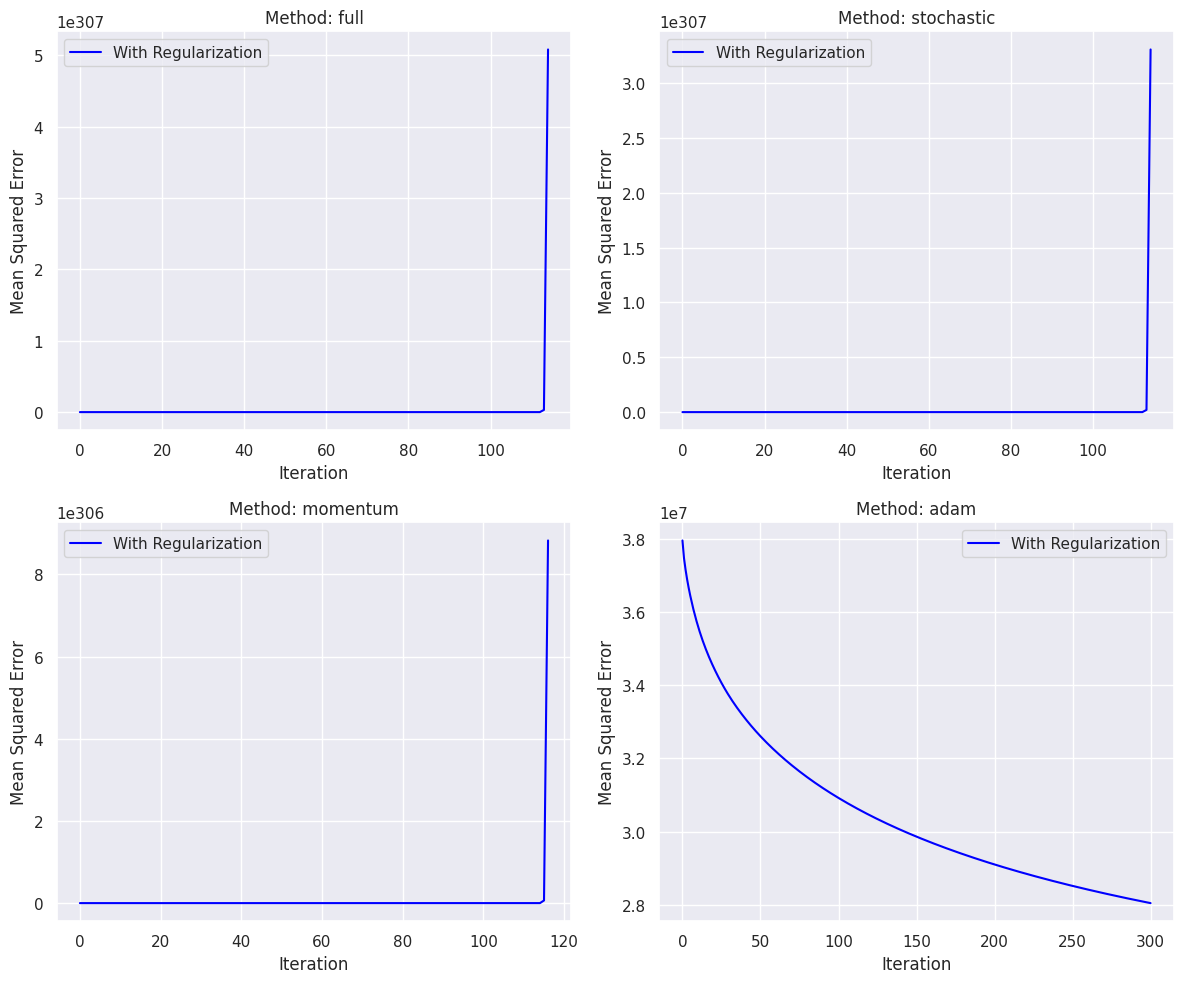

In [ ]:
plt.figure(figsize=(12, 10))
for idx, result in enumerate(results):
    plt.subplot(2, 2, idx + 1)


    padded_losses_with_Reg = pad_sequences(result['loss_history_with_reg'])

    plt.plot(padded_losses_with_Reg, label='With Regularization', color='blue')
    plt.title(f'Method: {result["method"]}')
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.legend()
plt.tight_layout()
plt.show()

Во-первых, регуляризация очень сильно замедлила код: обучение теперь длилось почти час (очень не советую перезапускать чанк с моделью без необходимости)
Во-вторых, количество итераций до сходимости увеличилось.
На обучающей выборке стало похуже, на тестовой качество улучшилось: модели сложнее обучаться с учетом регуляризации, но проще на тестовой выборке выдавать более правильные результаты.

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`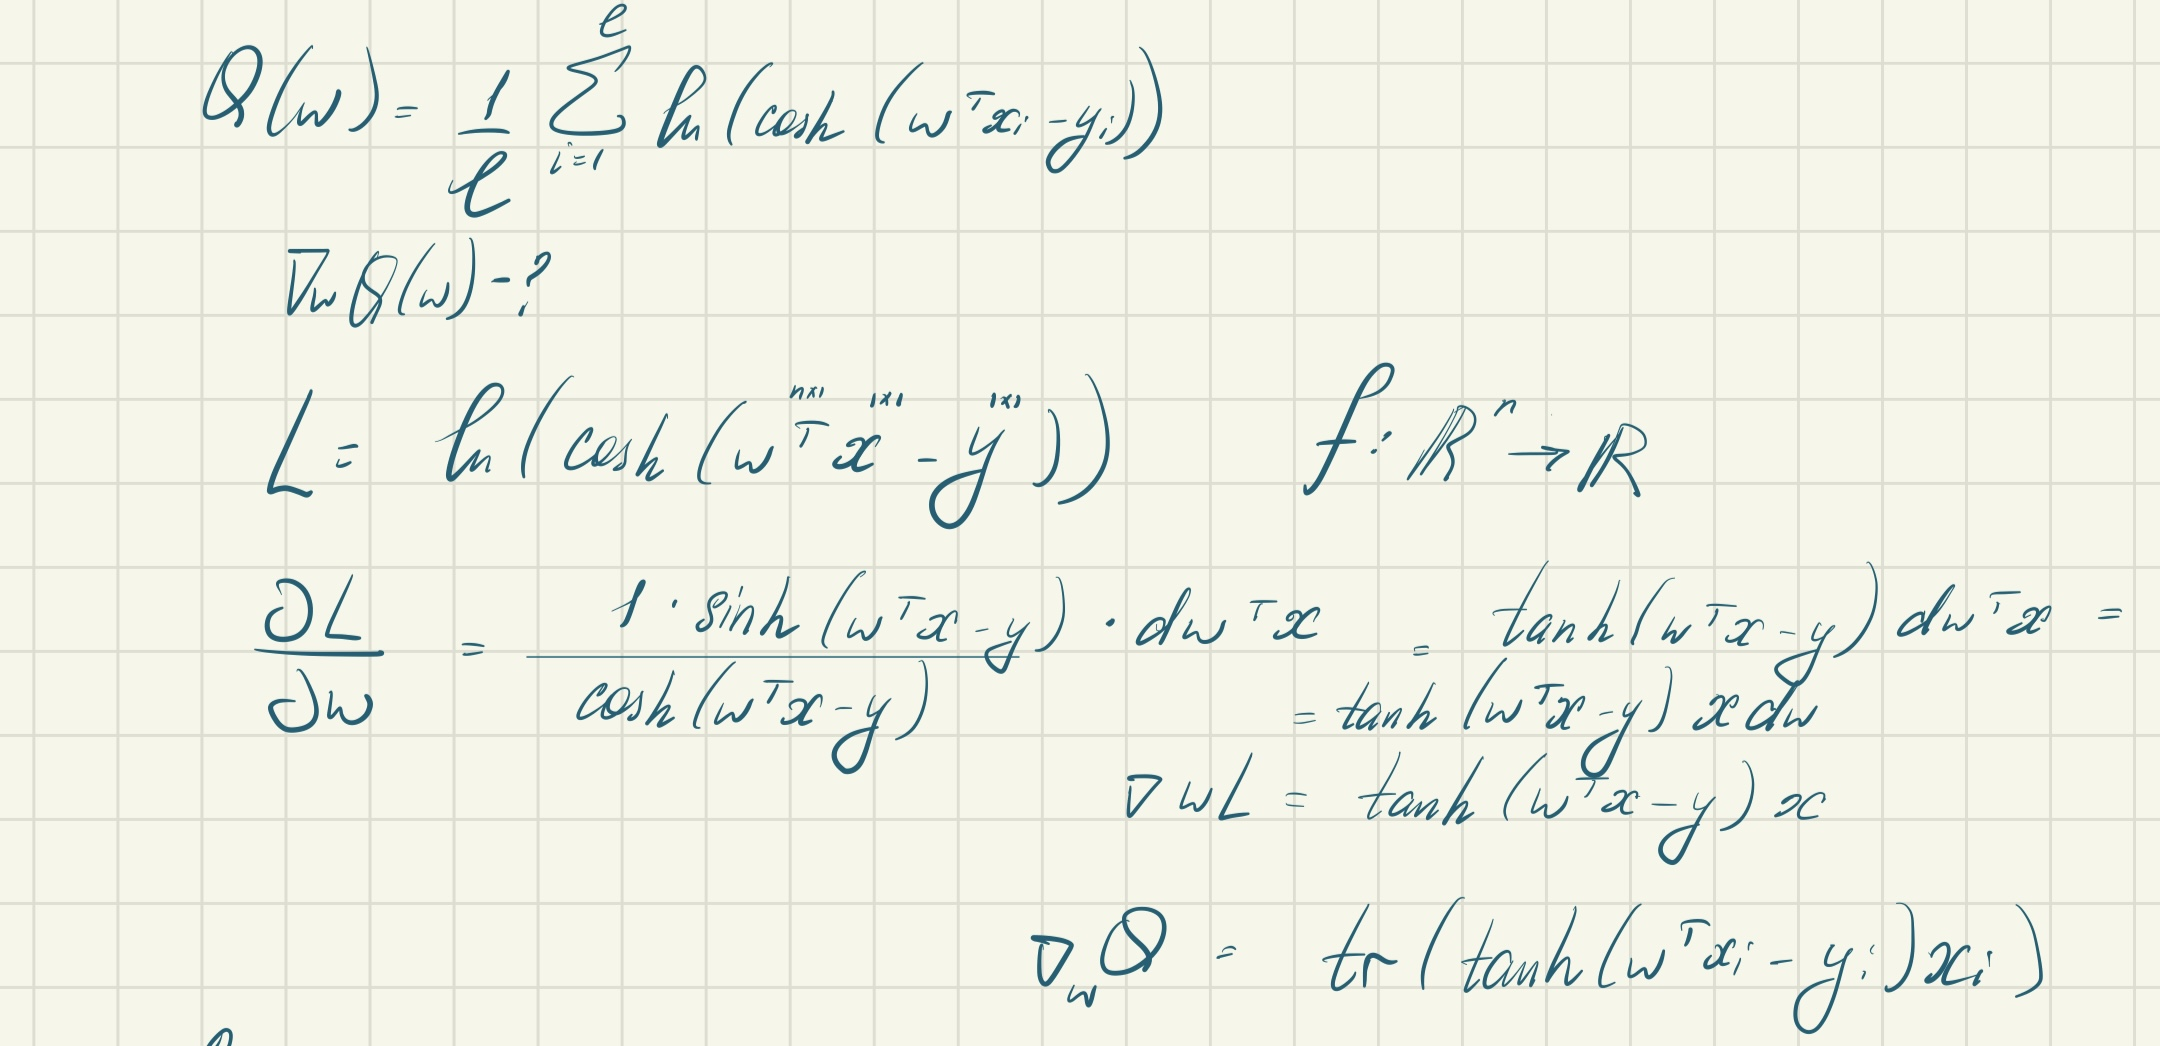

In [ ]:
from dataclasses import dataclass
from enum import auto
from enum import Enum
from typing import Dict
from typing import Type

import numpy as np


@dataclass
class LearningRate:
    lambda_: float = 1e-3
    s0: float = 1
    p: float = 0.5

    iteration: int = 0

    def __call__(self):
        """
        Calculate learning rate according to lambda (s0/(s0 + t))^p formula
        """
        self.iteration += 1
        return self.lambda_ * (self.s0 / (self.s0 + self.iteration)) ** self.p


class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()


class BaseDescent:
    """
    A base class and templates for all functions
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        """
        :param dimension: feature space dimension
        :param lambda_: learning rate parameter
        :param loss_function: optimized loss function
        """
        self.w: np.ndarray = np.random.rand(dimension)
        self.lr: LearningRate = LearningRate(lambda_=lambda_)
        self.loss_function: LossFunction = loss_function

    def step(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        return self.update_weights(self.calc_gradient(x, y))

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        """
        Template for update_weights function
        Update weights with respect to gradient
        :param gradient: gradient
        :return: weight difference (w_{k + 1} - w_k): np.ndarray
        """
        pass

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Template for calc_gradient function
        Calculate gradient of loss function with respect to weights
        :param x: features array
        :param y: targets array
        :return: gradient: np.ndarray
        """
        pass

    def calc_loss(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculate loss for x and y with our weights
        :param x: features array
        :param y: targets array
        :return: loss: float
        """
        print(')()')
        if self.loss_function is LossFunction.MSE:
            print('!!')
            loss = (1 / x.shape[0]) * (y - x @ self.w).T @ (y - x @ self.w)
        elif self.loss_function is LossFunction.LogCosh:
            loss = (np.mean(np.log(np.cosh(y - x @ self.w))))


        return loss


        predictions = self.predict(x)
        return np.mean((y - predictions) ** 2)
        raise NotImplementedError('BaseDescent calc_loss function not implemented')

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Calculate predictions for x
        :param x: features array
        :return: prediction: np.ndarray
        """
        y_pred = np.dot(x, self.w)
        return y_pred

        if self.w is None:
            raise Exception("Веса не инициализированы")
        return x @ self.w
        raise NotImplementedError('BaseDescent predict function not implemented')


class VanillaGradientDescent(BaseDescent):
    """
    Full gradient descent class
    """

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        learning_rate = self.lr()
        weight_difference = -learning_rate * gradient
        self.w += weight_difference
        return weight_difference

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            y_pred = self.predict(x)
            gradient = (-2/x.shape[0]) * np.dot(x.T, (y - y_pred))
        if self.loss_function is LossFunction.LogCosh:
            gradient = (-1/x.shape[0])* (np.tanh(y - x @ self.w) @ x)
        return gradient

class StochasticDescent(VanillaGradientDescent):
    """
    Stochastic gradient descent class
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, batch_size: int = 50,
                 loss_function: LossFunction = LossFunction.MSE):
        """
        :param batch_size: batch size (int)
        """
        super().__init__(dimension, lambda_, loss_function)
        self.batch_size = batch_size

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        indices = np.random.randint(0, x.shape[0], self.batch_size)
        x_batch = x[indices]
        y_batch = y[indices]
        predictions = self.predict(x_batch)
        gradient = 2 / self.batch_size * x_batch.T @ (predictions - y_batch)
        return gradient

        raise NotImplementedError('StochasticDescent calc_gradient function not implemented')


class MomentumDescent(VanillaGradientDescent):
    """
    Momentum gradient descent class
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        super().__init__(dimension, lambda_, loss_function)
        self.alpha: float = 0.9

        self.h: np.ndarray = np.zeros(dimension)

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        learning_rate = self.lr()
        self.h = self.alpha * self.h + learning_rate * gradient
        weight_difference = -self.h
        self.w += weight_difference
        return weight_difference

        raise NotImplementedError('MomentumDescent update_weights function not implemented')


class Adam(VanillaGradientDescent):
    """
    Adaptive Moment Estimation gradient descent class
    """

    def __init__(self, dimension: int, lambda_: float = 1e-3, loss_function: LossFunction = LossFunction.MSE):
        super().__init__(dimension, lambda_, loss_function)
        self.eps: float = 1e-8

        self.m: np.ndarray = np.zeros(dimension)
        self.v: np.ndarray = np.zeros(dimension)

        self.beta_1: float = 0.9
        self.beta_2: float = 0.999

        self.iteration: int = 0

    def update_weights(self, gradient: np.ndarray) -> np.ndarray:
        self.iteration += 1

        self.m = self.beta_1 * self.m + (1 - self.beta_1) * gradient
        self.v = self.beta_2 * self.v + (1 - self.beta_2) * (gradient ** 2)

        m_corrected = self.m / (1 - self.beta_1 ** self.iteration)
        v_corrected = self.v / (1 - self.beta_2 ** self.iteration)

        learning_rate = self.lr()
        weight_difference = -learning_rate * m_corrected / (np.sqrt(v_corrected) + self.eps)
        self.w += weight_difference

        return weight_difference
        raise NotImplementedError('Adagrad update_weights function not implemented')


class BaseDescentReg(BaseDescent):
    """
    A base class with regularization
    """

    def __init__(self, *args, mu: float = 0, **kwargs):
        """
        :param mu: regularization coefficient (float)
        """
        super().__init__(*args, **kwargs)

        self.mu = mu

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Calculate gradient of loss function and L2 regularization with respect to weights
        """
        l2_gradient = self.w

        l2_gradient[-1] = 0

        return super().calc_gradient(x, y) + l2_gradient * self.mu


class VanillaGradientDescentReg(BaseDescentReg, VanillaGradientDescent):
    """
    Full gradient descent with regularization class
    """


class StochasticDescentReg(BaseDescentReg, StochasticDescent):
    """
    Stochastic gradient descent with regularization class
    """


class MomentumDescentReg(BaseDescentReg, MomentumDescent):
    """
    Momentum gradient descent with regularization class
    """


class AdamReg(BaseDescentReg, Adam):
    """
    Adaptive gradient algorithm with regularization class
    """


def get_descent(descent_config: dict) -> BaseDescent:
    descent_name = descent_config.get('descent_name', 'full')
    regularized = descent_config.get('regularized', False)

    descent_mapping: Dict[str, Type[BaseDescent]] = {
        'full': VanillaGradientDescent if not regularized else VanillaGradientDescentReg,
        'stochastic': StochasticDescent if not regularized else StochasticDescentReg,
        'momentum': MomentumDescent if not regularized else MomentumDescentReg,
        'adam': Adam if not regularized else AdamReg
    }

    if descent_name not in descent_mapping:
        raise ValueError(f'Incorrect descent name, use one of these: {descent_mapping.keys()}')

    descent_class = descent_mapping[descent_name]

    return descent_class(**descent_config.get('kwargs', {}))


descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

Тут код в чанке ругается, на самом деле он рабочий, просто если по порядку запускать, то ему плохо. Ругается он на те строки, которые были изначально в файле descents и которые прошли контест   

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: